For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [376]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [377]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

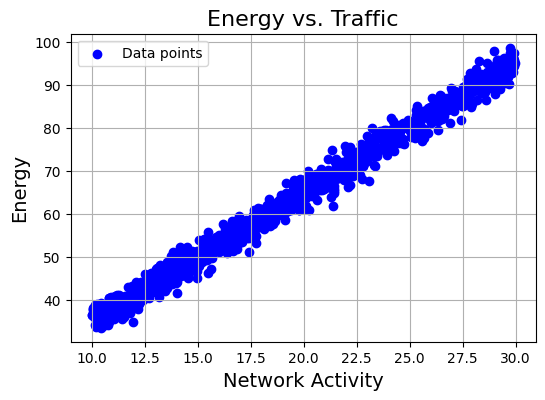

In [378]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [379]:
lr = LinearRegression(lr=0.001, epochs=1000)

lr.fit(data['Net_Activity'], data['Energy'])

print(f"theta0 = {lr.theta0}\ntheta1 = {lr.theta1}")

# predictions
y_pred = lr.predict(data['Net_Activity'])


theta0 = 0.49394867131336145
theta1 = 3.2117100892250265


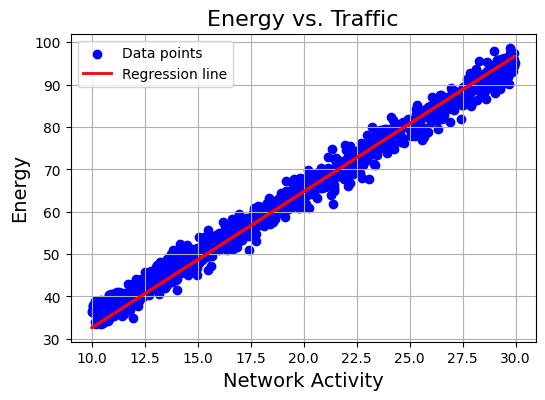

Formula: y = 0.494 + 3.212*x


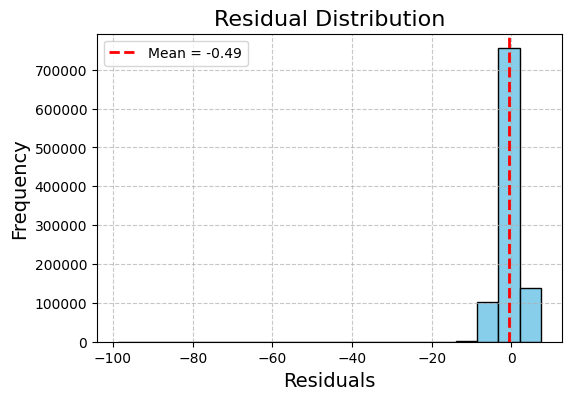

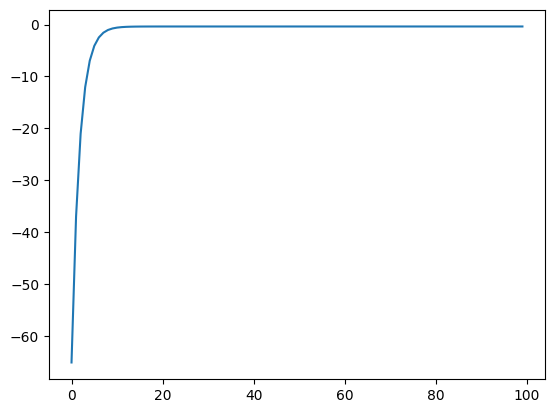

[-65.1457666  -36.97448544 -21.0527561  -12.05417318  -6.96838292
  -4.09400718  -2.46946871  -1.55130763  -1.03237375  -0.73907329
  -0.5732953   -0.4795899   -0.42661816  -0.39666808  -0.37972929
  -0.37014415  -0.36471512  -0.36163502  -0.35988248  -0.35888025
  -0.35830207  -0.35796356  -0.3577605   -0.357634    -0.35755077
  -0.35749199  -0.35744704  -0.3574099   -0.35737717  -0.35734694
  -0.35731813  -0.35729011  -0.35726254  -0.35723524  -0.35720807
  -0.357181    -0.35715396  -0.35712696  -0.35709998  -0.357073
  -0.35704603  -0.35701907  -0.35699211  -0.35696515  -0.35693819
  -0.35691124  -0.35688429  -0.35685734  -0.35683039  -0.35680345
  -0.35677651  -0.35674957  -0.35672263  -0.35669569  -0.35666876
  -0.35664182  -0.35661489  -0.35658797  -0.35656104  -0.35653411
  -0.35650719  -0.35648027  -0.35645335  -0.35642644  -0.35639952
  -0.35637261  -0.3563457   -0.35631879  -0.35629189  -0.35626498
  -0.35623808  -0.35621118  -0.35618428  -0.35615739  -0.35613049
  -0.3561036

In [380]:
## Discussion
# a)

# plot
plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], y_pred, c='red', linewidth=2, label='Regression line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

# formula
print(f"Formula: y = {round(lr.theta0, 3)} + {round(lr.theta1, 3)}*x")

# b)
# residuals
residuals = np.array(lr.residuals).flatten()

plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {residuals.mean():.2f}')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Residual Distribution', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# plot
residuals = np.array(lr.residuals)[0:100].mean(axis=1)
plt.plot(residuals)
plt.show()
print(residuals)

print(f"Når en estimator er unbiased betyr det at den predikerte verdien (y_hat) er lik den faktiske verdien (y).\n"
      f"Med andre ord at residualene er lik null. Ut fra histogrammet ser vi at residualene ligger på rundt null.")

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

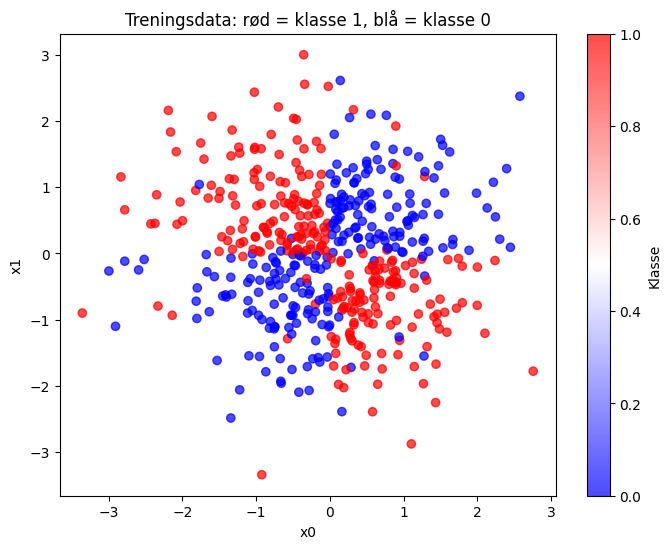

In [381]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']


# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(train["x0"], train["x1"], c=train["y"], cmap="bwr", alpha=0.7)
plt.xlabel("x0")
plt.ylabel("x1")
plt.title("Treningsdata: rød = klasse 1, blå = klasse 0")
plt.colorbar(label="Klasse")
plt.show()

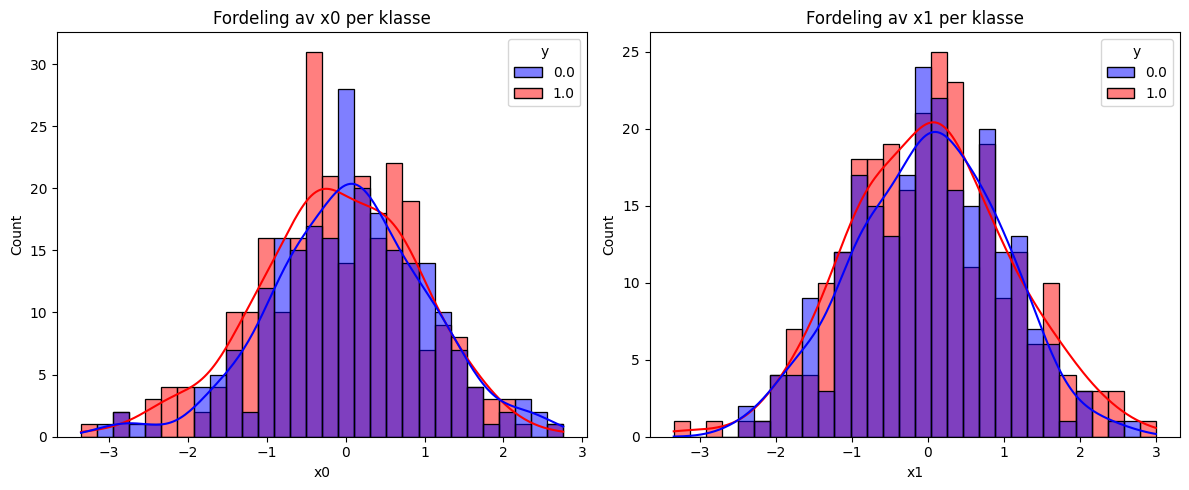

In [382]:
# histograms

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=train, x="x0", hue="y", kde=True, bins=30, palette={0:"blue", 1:"red"}, ax=axes[0])
axes[0].set_title("Fordeling av x0 per klasse")

sns.histplot(data=train, x="x1", hue="y", kde=True, bins=30, palette={0:"blue", 1:"red"}, ax=axes[1])
axes[1].set_title("Fordeling av x1 per klasse")

plt.tight_layout()
plt.show()

In [383]:
from logistic_regression import LogisticRegression

# preprocessere data
X_train = train[['x0', 'x1']].values
y_train = train['y'].values

X_test = test[['x0', 'x1']].values
y_test = test['y'].values

# opprette objekt
logreg = LogisticRegression(0.01, 5000)

# model fitting (training data)
logreg.fit1(X_train, y_train)
print(f"bias: {logreg.b}\nw0: {logreg.w0}\nw1: {logreg.w1}")

# model prediction (test data)
accuracy = logreg.accuracy1(X_test, y_test, threshold=0.5)
print(f"Accuracy: {accuracy}")




bias: 0.09201880180517406
w0: -0.1436026167590647
w1: 0.006255625162927644
Accuracy: 0.49


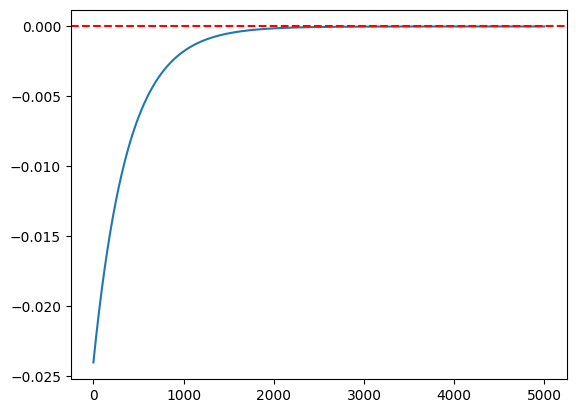

In [384]:
residuals = np.array(logreg.residuals).mean(axis=1)
ss = residuals[-100:].mean() # steady state

plt.plot(residuals, label="Residuals")
plt.axhline(ss, color="red", linestyle="--", label=round(ss, 5))



In [385]:
# feture engineering
x0_train = X_train[:, 0]
x1_train = X_train[:, 1]
X_train2 = np.column_stack([x0_train, x1_train, x0_train**2, x1_train**2, x0_train*x1_train])
x0_test = X_test[:, 0]
x1_test = X_test[:, 1]
X_test2 = np.column_stack([x0_test, x1_test, x0_test**2, x1_test**2, x0_test*x1_test])
logreg2 = LogisticRegression(0.01, 1000)

logreg2.fit2(X_train2, y_train)

acc = logreg2.accuracy2(X_test2, y_test, 0.5)

print(f"Accuracy with feature engineering: {acc}")


Accuracy with feature engineering: 0.884


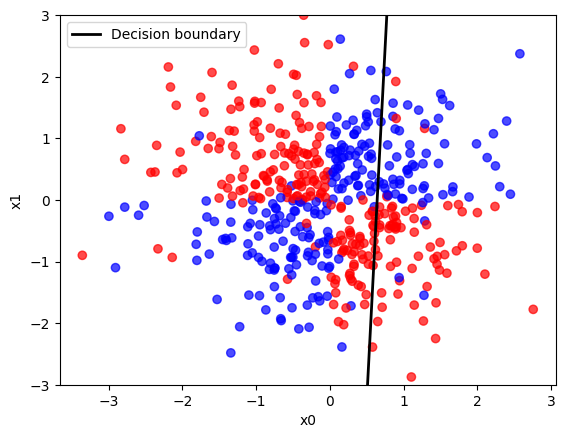

In [386]:
# scatter plot med sanne labels
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.7)

# lag en linje som representerer beslutningsgrensen
x_values = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 100)
y_values = -(logreg.b + logreg.w0*x_values) / logreg.w1
plt.plot(x_values, y_values, color='black', linewidth=2, label="Decision boundary")

plt.xlabel("x0")
plt.ylabel("x1")
plt.ylim(-3, 3)
plt.legend()
plt.show()

In [387]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve



clf = DecisionTreeClassifier(random_state=15)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy:", acc)



Decision Tree accuracy: 0.874


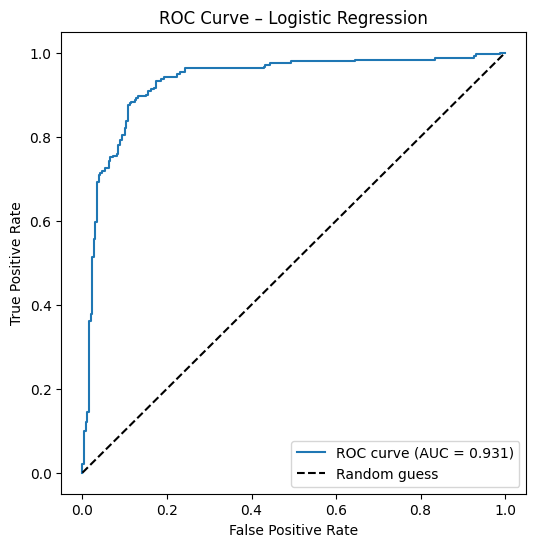

In [388]:

tpr, fpr, auc = logreg2.roc_curve(X_test2, y_test)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc='lower right')
plt.show()



### Discussion (Mission 2)

**a. Explain poor initial performance and your improvements**

The logistic regression model can only predict straight lines when it haves two features. As you can se in the plot below this results in a random decision baundary with an accuracy at 0.49.


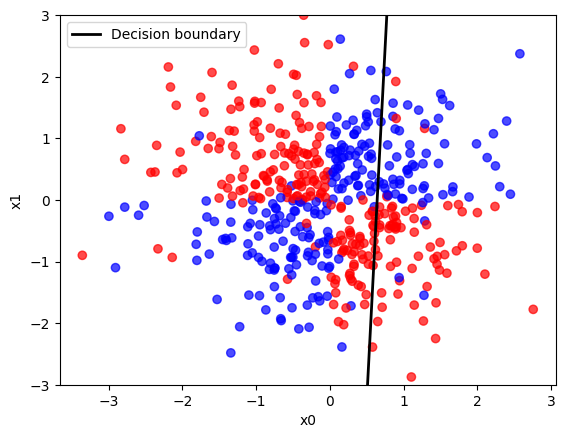

As shown in the picture it is not a linear fit between the data, therefore we need to feature engineer non-linearity into the data. First adding featuers squaring x0 and x1, then adding a interaction feature. With these changes the model can predict curved lines, that fits the data structure better. The results was an accuracy at 0.884!


**b. What is the model's inductive bias. Why is it important?**

As explained in a) the model assumes that its a linear fit between the data and the output without feature engineering. This is called the inductive bias, the assumption that its linear. When introducting polynomial features to improve accuracy we change the inductive bias to a non linear relation between the data.


**c. Try to solve the problem using `sklearn.treeDecisionTreeClassifier`. Can it solve the problem? Why/Why not?**

Using decision trees without feature engineering we get an accuracy at 0.874, which is very close to the perfomance limit at 0.88. This explains that decision trees can catch non linear boundaries. When fitting the model with feature engineering we get an accuracy at 0.894, that is better the n logistic regression. We can safely say that decision trees can solve this problem. 

**d. Plot the ROC curve**
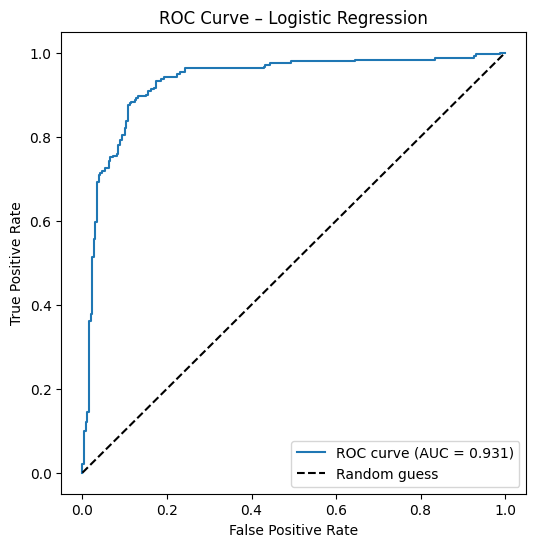


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [389]:
# data processing

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

y_train = train.iloc[:, -1].values
X_train = train.iloc[:, :-1].values
y_test = test.iloc[:, -1].values  
X_test = test.iloc[:, :-1].values

# encryption


print(X_train.shape)

(8000, 11)


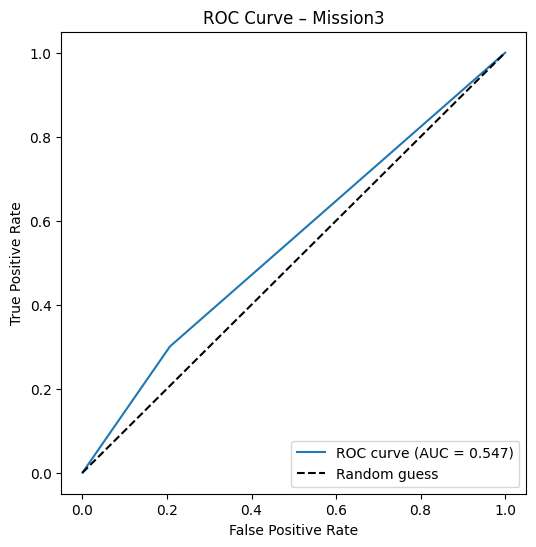

In [390]:
# decision tree

from decision_tree_mission3 import DecisionTreeMission3

dtree = DecisionTreeMission3()

dtree.fit(X_train, y_train)




tpr, fpr, auc = dtree.roc_metrics(X_test, y_test)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Mission3')
plt.legend(loc='lower right')
plt.show()



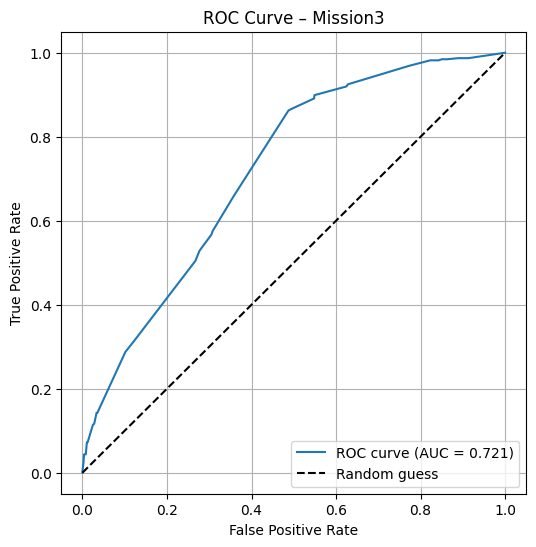

In [391]:
# decryption

params = {
    "criterion": "entropy",
    "max_depth": 6,
    "min_samples_leaf": 2,
    "min_samples_split": 2,
    "random_state": 50,
}

dtree1 = DecisionTreeMission3(decision_tree_params=params)

X_train_dec = dtree1.decryption(X_train, feature_idx=3)
X_test_dec  = dtree1.decryption(X_test, feature_idx=3)

dtree1.fit(X_train_dec, y_train)

tpr, fpr, auc = dtree1.roc_metrics(X_test_dec, y_test)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Mission3')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Test AUC: 0.725


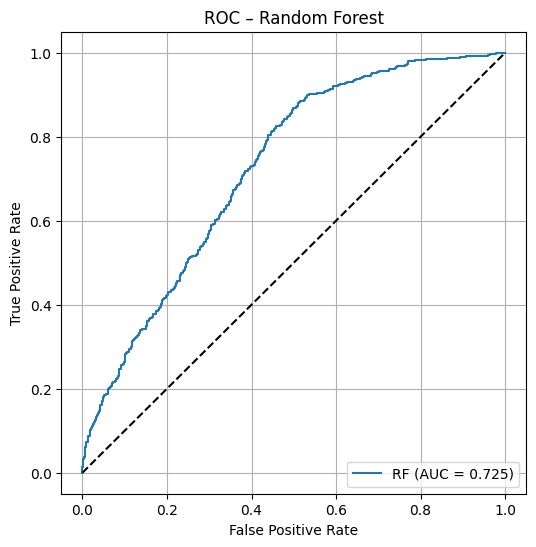

In [392]:
from sklearn.ensemble import RandomForestClassifier


# enkel, robust RF for ubalanse
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    min_samples_leaf=2,
    max_features="sqrt",
    class_weight="balanced_subsample",
    random_state=50,
    n_jobs=-1
)

rf.fit(X_train_dec, y_train)
p_test = rf.predict_proba(X_test_dec)[:, 1]
auc = roc_auc_score(y_test, p_test)
print(f"Test AUC: {auc:.3f}")

# ROC-plot
fpr, tpr, _ = roc_curve(y_test, p_test)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'RF (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC – Random Forest'); plt.legend(loc='lower right'); plt.grid(True)
plt.show()

### Discussion (Mission 3)

   **a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?**

   Decrypted datastream 3 first, did not get the right AUC value. Then tweaking the hyperparameters, did gridsearch later on to get the best parameters.

   **b. Justify ROC AUC usage. Plot and interpret ROC.**

   The data is unbalanced, the train dataset contains 8000 samples and the test data contains 2000 samples. This will resultes in tricky accuracy values, we can get an accuracy at 0.80 with a model that onlu guesses zero. ROC is better because it measuers True positives and false postivtes up on each other and takes the integral of the curve to compute to AUC. By using these rates we get a more solid measurment of accuracy. If its above base line (0.5) we get good results.
   
   **c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.**
   
   Got better AUC value without using much time on finding the best hyperparameters. I would argue random forest is better.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

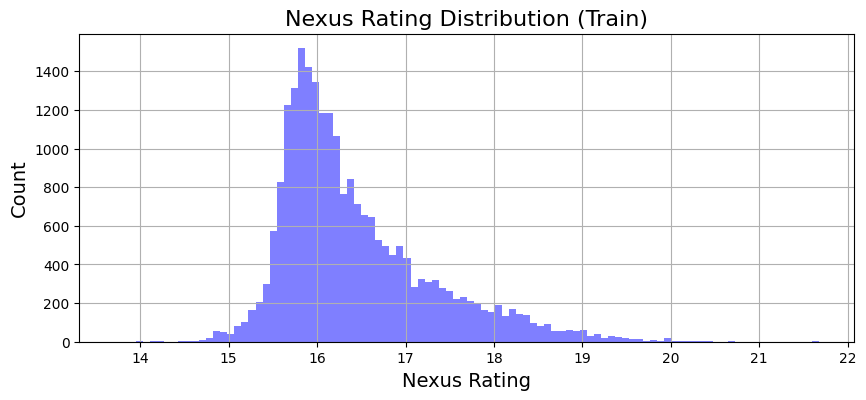

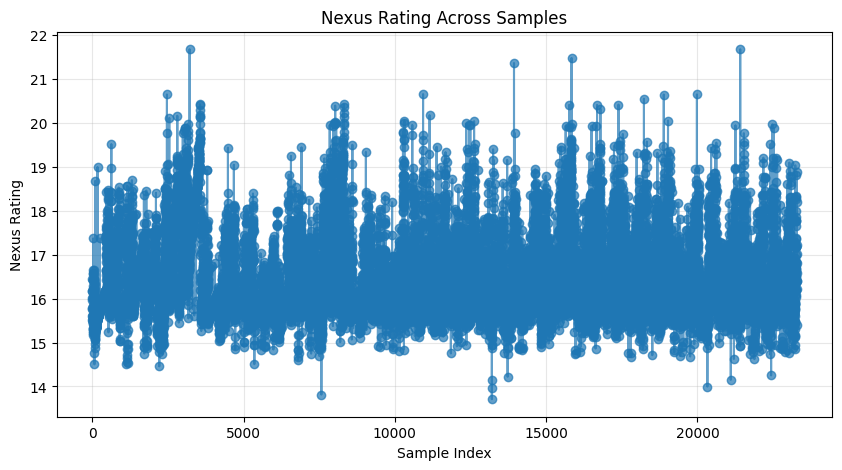

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# load data
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')
nexusRating = test['grid_connections']
ownershipType = test['ownership_type']

# shift the data
test = test.shift(1, axis=1)

test.iloc[:, 0] = ownershipType

test.iloc[:, 1] = nexusRating

# split
X_train = train.drop('nexus_rating', axis=1)
X_test = test.drop('nexus_rating', axis=1)
y_train = train['nexus_rating']
y_test = test['nexus_rating']

y_train = np.log1p(y_train)




# data analysis
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
y_train.hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(y_train, marker="o", linestyle="-", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Nexus Rating")
plt.title("Nexus Rating Across Samples")
plt.grid(alpha=0.3)
plt.show()


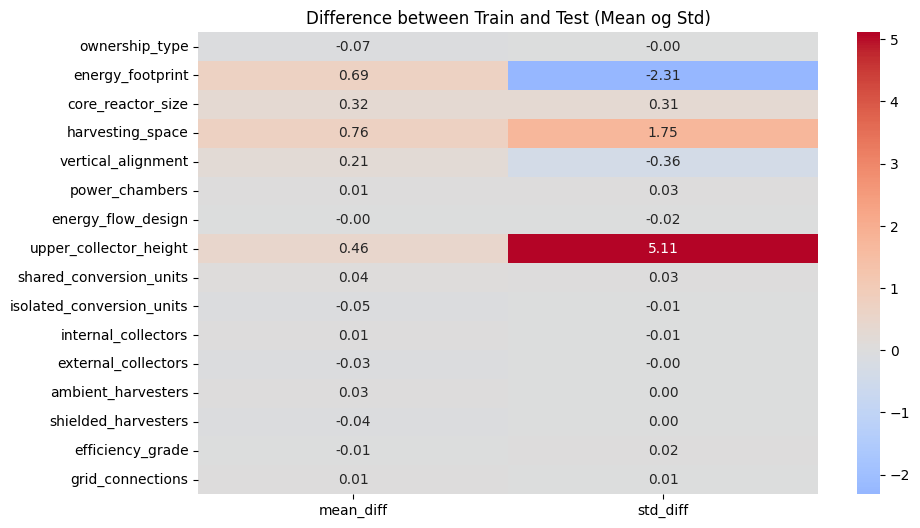

In [394]:
# feature sabotage analysis

# beregn statistikk for train og test
stats_train = X_train.describe().T
stats_test = X_test.describe().T

# legg sammen i en dataframe
stats_compare = stats_train[["mean","std","min","max"]].copy()
stats_compare.columns = [f"train_{c}" for c in stats_compare.columns]
stats_compare["test_mean"] = stats_test["mean"]
stats_compare["test_std"] = stats_test["std"]
stats_compare["test_min"] = stats_test["min"]
stats_compare["test_max"] = stats_test["max"]

# beregn differanser (test - train)
diffs = stats_compare[[c for c in stats_compare.columns if "mean" in c or "std" in c]]
diffs = diffs.assign(
    mean_diff = stats_compare["test_mean"] - stats_compare["train_mean"],
    std_diff = stats_compare["test_std"] - stats_compare["train_std"]
)

# heatmap av mean_diff og std_diff
plt.figure(figsize=(10,6))
sns.heatmap(diffs[["mean_diff","std_diff"]], annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Difference between Train and Test (Mean og Std)")
plt.show()

In [395]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


In [396]:
from catboost import CatBoostRegressor

# catboost
cbr = CatBoostRegressor(iterations=1000, learning_rate=0.055, depth=10, random_seed=46, verbose=False)
cbr.fit(X_train, y_train)
cbr_pred = cbr.predict(X_test)
cbr_pred = np.expm1(cbr_pred)
val = rmsle(y_test, cbr_pred)

print("RMSLE requirement: 0.294")
print(f"Measured RMSLE: {val:.5f}")

RMSLE requirement: 0.294
Measured RMSLE: 0.29378


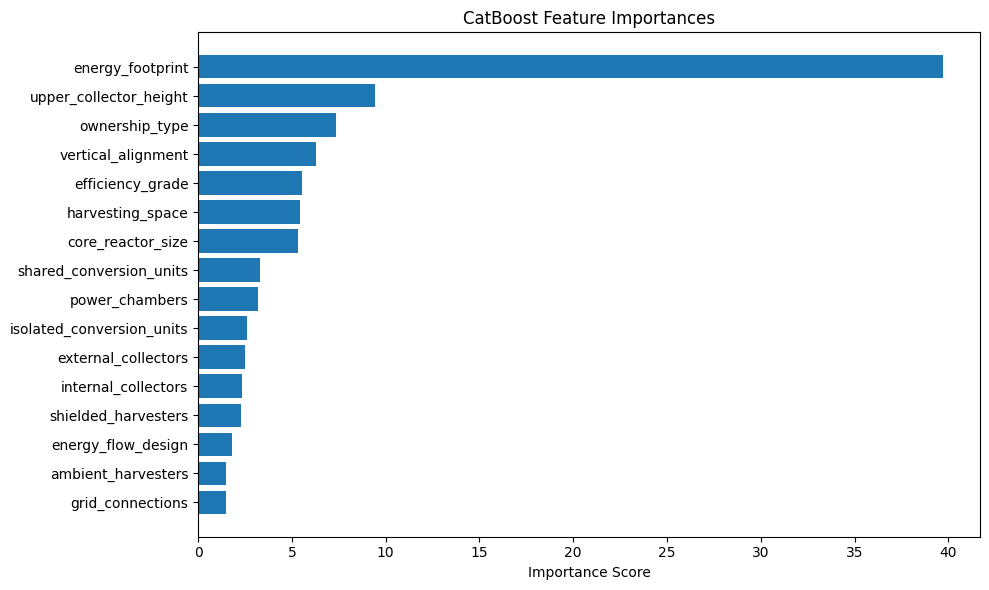

In [397]:
# feature importance plot
importances = cbr.get_feature_importance()
features = X_train.columns

indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel("Importance Score")
plt.title("CatBoost Feature Importances")
plt.tight_layout()
plt.show()

### Discussion (Final Mission)

  **a. Explain your threshold-breaking strategy**
  
  Used the hint and found out that grid_connections was deviating a lot from training and test data. After some failed scaling attempts I found out that the columns was shifted in the test data. 


  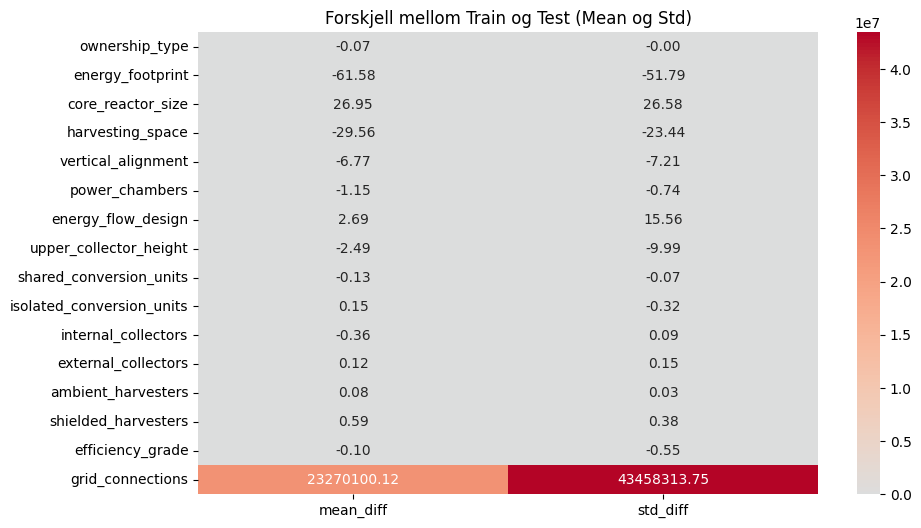
   


  Took the log(1 + x) of target transforming fitting in to log space. I took log(1 + x) because log(0) becomes minus infinity. Its important to transform back from logspace when predicting, because og rmsle is performing log, a double log will get fake low rmsle. Trained catboost model with hyperparameters that was found in coorporation with student mates.

   **b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?**


In this case the target value spans several orders in magnitude, thererfore it makes sense to take the log of the target, this will handle large value ranges. In addition we care about realtive error and we want to avoid penalizing large outliers. The loss function used was root mean square error (RMSE).

   **c. Plot and interpret feature importances**

The most important feature is energy_footprint


   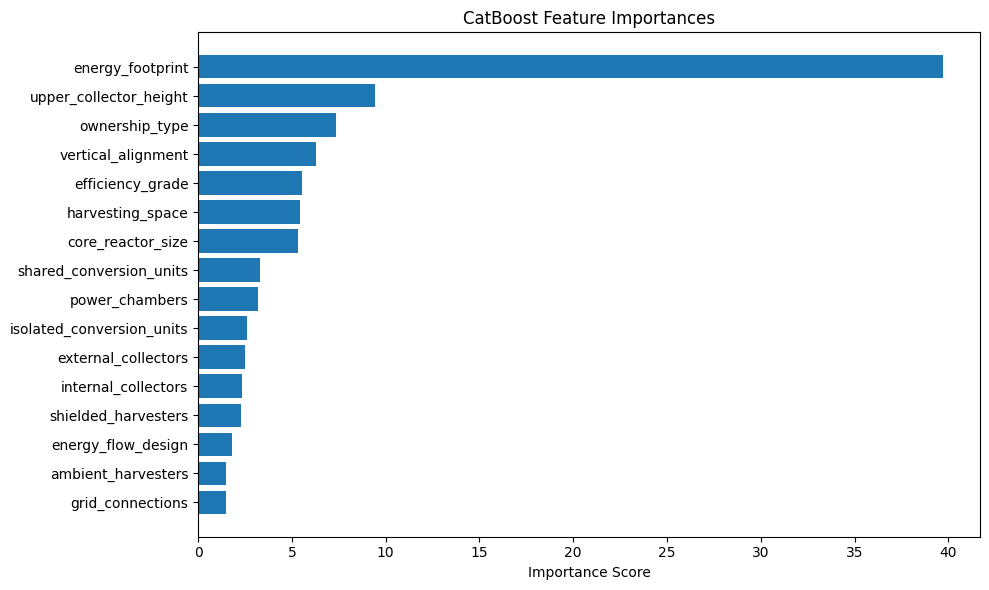

   **d. Describe your ensembling techniques**

I did not use any ensamling techniques because the RMSLE was good enough without it. But i would probably use the mean of the predictions.

   **e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data?**

If you dont have test targets, you can use cross validation and some validation split to guess how the model will performe. If the model looks good many times on validation, then maybe it also work okay on new data you never see.